<a href="https://colab.research.google.com/github/sfatimazahra/AI-Headshot-Generator/blob/master/test_headshots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An implementation of a pretrained LORA on business headshots, using the stable diffusion pipeline from huggingface.


In [3]:
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers
!pip install -U peft
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# print(torch.__version__)

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def plotgrid(list_images, list_titles, rows, cols, grid, figname, figsize=(10, 10)):
    num_images  = len(list_images)
    num_cols    = cols
    num_rows    = rows

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    # ax[rows,cols]
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    # Create list of axes for easy iteration.
    for i in range(num_images):
          img    = list_images[i]
          title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
          list_axes[i].imshow(img)
          list_axes[i].set_title(title)
          list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

    plt.savefig(figname) if figname is not None else 'Untitled'

In [5]:
# using SD V1.5 as base model first
from diffusers import AutoPipelineForImage2Image

# base model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = AutoPipelineForImage2Image.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.enable_model_cpu_offload()

# download LoRA weights
lora_path = '/content/drive/MyDrive/Devsort/AI Headshots/models'
# load LoRA weights
pipe.load_lora_weights(lora_path, weight_name="Close-up_Business_Headshots_r1.safetensors")



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# Set a random seed
generator = torch.manual_seed(0)

  0%|          | 0/50 [00:00<?, ?it/s]

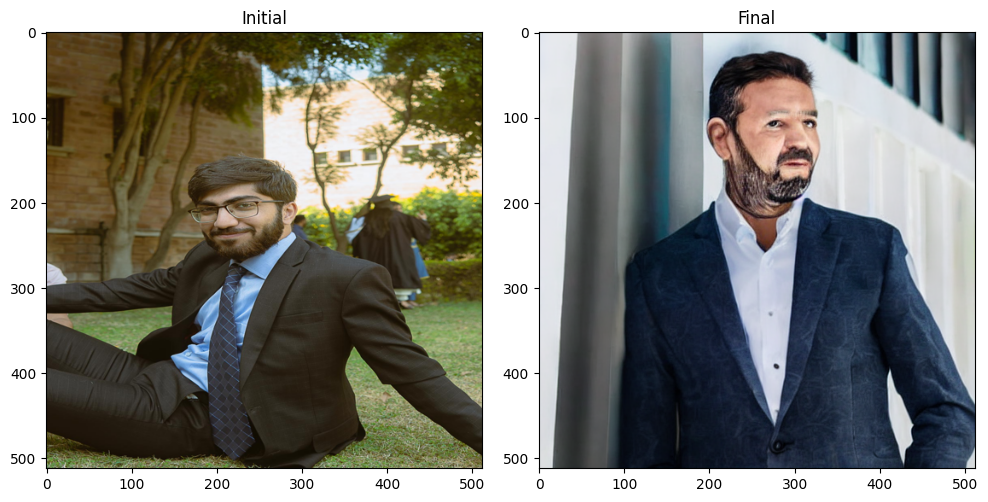

<Figure size 640x480 with 0 Axes>

In [7]:
# uploading image
init_image = Image.open("/content/drive/MyDrive/Devsort/AI Headshots/images/DSC00061.jpg")
init_image = init_image.resize((512, 512))

prompt = "man with blue background, good lighting, high quality"
negative_prompt = "cropped, worst quality, low quality, normal quality, shadows, bad lighting, not plain background"

# pass prompt and image to pipeline
images = []
images.append(init_image)
# plt.imshow(images[0])

image = pipe(prompt, negative_prompt=negative_prompt, strength = 1, generator= generator, image=init_image).images[0]
images.append(image)
titles = ['Initial', 'Final']
plotgrid(images, titles, 1, 2, False, 'SD V1.5.png')



In [8]:
# Different Model
from diffusers import StableDiffusionXLImg2ImgPipeline
model_id = "stabilityai/stable-diffusion-xl-refiner-1.0"

pipe2 = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

# load LoRA weights
pipe2.load_lora_weights(lora_path, weight_name="Close-up_Business_Headshots_r1.safetensors")



model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: Error(s) in loading state_dict for UNet2DConditionModel:
	size mismatch for down_blocks.1.attentions.0.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([5120, 32]) from checkpoint, the shape in current model is torch.Size([6144, 32]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 2560]) from checkpoint, the shape in current model is torch.Size([32, 3072]).
	size mismatch for down_blocks.1.attentions.0.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.0.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.0.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([5120, 32]) from checkpoint, the shape in current model is torch.Size([6144, 32]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 2560]) from checkpoint, the shape in current model is torch.Size([32, 3072]).
	size mismatch for down_blocks.1.attentions.1.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.1.attentions.1.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for down_blocks.1.attentions.1.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for down_blocks.2.attentions.0.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for down_blocks.2.attentions.0.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.0.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.0.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for down_blocks.2.attentions.1.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for down_blocks.2.attentions.1.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for down_blocks.2.attentions.1.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for up_blocks.1.attentions.0.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.0.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.0.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for up_blocks.1.attentions.1.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.1.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.1.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for up_blocks.1.attentions.2.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.1.attentions.2.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for up_blocks.1.attentions.2.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for up_blocks.2.attentions.0.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([5120, 32]) from checkpoint, the shape in current model is torch.Size([6144, 32]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 2560]) from checkpoint, the shape in current model is torch.Size([32, 3072]).
	size mismatch for up_blocks.2.attentions.0.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.0.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.0.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([5120, 32]) from checkpoint, the shape in current model is torch.Size([6144, 32]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 2560]) from checkpoint, the shape in current model is torch.Size([32, 3072]).
	size mismatch for up_blocks.2.attentions.1.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.1.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.1.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([5120, 32]) from checkpoint, the shape in current model is torch.Size([6144, 32]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 2560]) from checkpoint, the shape in current model is torch.Size([32, 3072]).
	size mismatch for up_blocks.2.attentions.2.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for up_blocks.2.attentions.2.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 640, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 768]).
	size mismatch for up_blocks.2.attentions.2.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([640, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([768, 32]).
	size mismatch for mid_block.attentions.0.proj_in.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.proj_in.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_q.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_k.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight: copying a param with shape torch.Size([32, 768]) from checkpoint, the shape in current model is torch.Size([32, 1280]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_v.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.ff.net.0.proj.lora_B.default_0.weight: copying a param with shape torch.Size([10240, 32]) from checkpoint, the shape in current model is torch.Size([12288, 32]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.ff.net.2.lora_A.default_0.weight: copying a param with shape torch.Size([32, 5120]) from checkpoint, the shape in current model is torch.Size([32, 6144]).
	size mismatch for mid_block.attentions.0.transformer_blocks.0.ff.net.2.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32]) from checkpoint, the shape in current model is torch.Size([1536, 32]).
	size mismatch for mid_block.attentions.0.proj_out.lora_A.default_0.weight: copying a param with shape torch.Size([32, 1280, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1536]).
	size mismatch for mid_block.attentions.0.proj_out.lora_B.default_0.weight: copying a param with shape torch.Size([1280, 32, 1, 1]) from checkpoint, the shape in current model is torch.Size([1536, 32]).

In [ ]:
from diffusers.utils import load_image
url = "https://huggingface.co/datasets/patrickvonplaten/images/resolve/main/aa_xl/000000009.png"

init_image = load_image(url).convert("RGB")
init_image.size()

In [ ]:
lora_scale = 0.9

# uploading image
init_image = Image.open("/content/drive/MyDrive/Devsort/AI Headshots/images/DSC00061.jpg")

prompt = "man with blue background, good lighting, high quality"
negative_prompt = "cropped, worst quality, low quality, normal quality, shadows, bad lighting, not plain background"

# pass prompt and image to pipeline
images = []
images.append(init_image)
# plt.imshow(images[0])

image = pipe2(
    prompt, negative_prompt=negative_prompt,  num_inference_steps=30, cross_attention_kwargs={"scale": lora_scale}, generator= generator, image=init_image).images[0]
images.append(image)
titles = ['Initial', 'Final']
plotgrid(images, titles, 1, 2, False, 'SDXL refiner.png')